In [2]:
## Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('salary_data_cleaned2.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,company_age,python_skill,spark_skill,aws_skill,excel_skill,job_simplified,seniority,desc_len,no_competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,49,1,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,38,1,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,12,1,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,57,1,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,24,1,0,0,1,data scientist,na,2728,3


#### Chosing relevant columns:

In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'same_state', 'company_age', 'python_skill', 'spark_skill',
       'aws_skill', 'excel_skill', 'job_simplified', 'seniority', 'desc_len',
       'no_competitors'],
      dtype='object')

In [5]:
df['Sector']

0               Aerospace & Defense
1                       Health Care
2                 Business Services
3      Oil, Gas, Energy & Utilities
4                 Business Services
                   ...             
737       Biotech & Pharmaceuticals
738          Information Technology
739                       Education
740               Business Services
741                      Government
Name: Sector, Length: 742, dtype: object

In [6]:
model_df = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','no_competitors','hourly', 'employer_provided','job_state', 'same_state', 'company_age', 'python_skill', 'spark_skill','aws_skill', 'excel_skill', 'job_simplified', 'seniority', 'desc_len']]
model_df.head()

,avg_salary,Rating,Size,Type of ownership,Industry,Sector,Revenue,no_competitors,hourly,employer_provided,job_state,same_state,company_age,python_skill,spark_skill,aws_skill,excel_skill,job_simplified,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,NM,0,49,1,0,0,1,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,MD,0,38,1,0,0,0,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,FL,1,12,1,1,0,1,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,WA,1,57,1,0,0,0,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,NY,1,24,1,0,0,1,data scientist,na,2728


#### Categorical columns:

In [7]:
df_dummies = pd.get_dummies(model_df)
df_dummies.head()

,avg_salary,Rating,no_competitors,hourly,employer_provided,same_state,company_age,python_skill,spark_skill,aws_skill,...,job_state_WI,job_simplified_data analyst,job_simplified_data engineer,job_simplified_data scientist,job_simplified_director,job_simplified_manager,job_simplified_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,49,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,38,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,12,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,57,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,24,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
X = df_dummies.drop('avg_salary', axis=1)

In [9]:
y = df_dummies['avg_salary']

#### Train test split:

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)

(593, 176)
(149, 176)


#### Linear Regression:

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [16]:
np.mean(cross_val_score(lr_model,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-20.69625653363171

#### Lasso Regression:

In [17]:
from sklearn.linear_model import Lasso

In [18]:
lasso_model = Lasso()
np.mean(cross_val_score(lasso_model,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-21.109730755459797

c:\ProgramData\Miniconda3\envs\ds\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+03, tolerance: 5.722e+01
  model = cd_fast.enet_coordinate_descent(


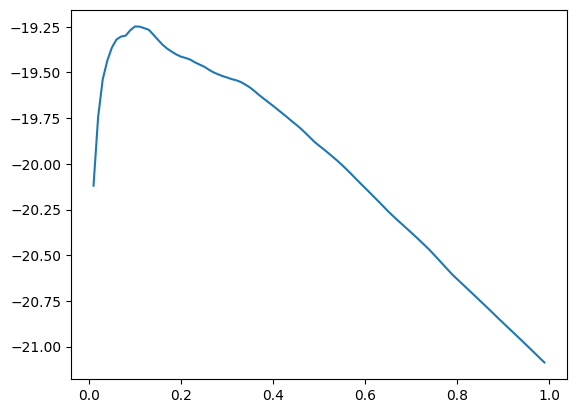

In [19]:
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)))
plt.plot(alpha,error)

In [20]:
err = tuple(zip(alpha,error))
df_error = pd.DataFrame(err,columns=['alpha','error'])
df_error[df_error.error == max(df_error.error)]

,alpha,error
9,0.1,-19.248758


In [21]:
## So the best alpha value is 0.1
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

So it seems that the Lasso Regression perform little better than Linear Regressiion. 

#### Random Forest Regressor:

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
np.mean(cross_val_score(rf_model,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-15.127224230460271

#### XGBRegressor:

In [24]:
import xgboost as xg

In [25]:
xg_model = xg.XGBRegressor()
np.mean(cross_val_score(xg_model,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-13.07999916891967

#### Model tuning using GridSearchCV:

In [26]:
from sklearn.model_selection import GridSearchCV

In [29]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,300,500]}
gs = GridSearchCV(xg_model,parameters,scoring='neg_mean_absolute_error',cv=3)

In [30]:
gs.fit(X_train,y_train)

[20:22:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:22:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:22:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:22:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:23:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:23:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [100, 300, 500], 'nthread': [4],
                         'objective': ['reg:linear'], 'subsample': [0.7]},
             scoring='neg_mean_absolute_error')

In [31]:
gs.best_score_

-13.264731322554212

In [32]:
gs.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'subsample': 0.7}

In [33]:
gs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=4,
             nthread=4, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, ...)

#### Test data:

In [34]:
lr_model_pred = lr_model.predict(X_test)

In [35]:
lasso_model_pred = lasso_model.predict(X_test)

In [39]:
rf_model_pred = rf_model.predict(X_test)

In [40]:
xg_model_pred = gs.best_estimator_.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error

In [43]:
print(f"Linear Regression: {mean_absolute_error(y_test,lr_model_pred)}")
print(f"Lasso: {mean_absolute_error(y_test,lasso_model_pred)}")
print(f"Random Forest Regression: {mean_absolute_error(y_test,rf_model_pred)}")
print(f"XGBOOST Regressor: {mean_absolute_error(y_test,xg_model_pred)}")

Linear Regression: 13556568.696536532
Lasso: 19.98667950017728
Random Forest Regression: 11.3656711409396
XGBOOST Regressor: 9.015734909364841


In [44]:
import pickle

In [45]:
pickle.dump(gs.best_estimator_,open('model.pkl','wb'))